3 Phases:

1. Structural Investigation
2. Quality Investigation
3. EDA

# URL for the dataset with the data dictionary:   https://www.openml.org/search?type=data&status=active&id=42803

# 1. Import standard Libs

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

# 2. Grab your data

In [2]:
df_example = pd.read_csv('https://raw.githubusercontent.com/fenago/compas-analysis/master/compas-scores.csv')

In [3]:
df_example.to_csv("periodic_backup.csv")

In [4]:
# accepts ssl certs for download
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import certifi

In [5]:
from sklearn.datasets import fetch_openml

# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

In [8]:
# Extract feature matrix X and show 5 random samples
df_X = dataset["frame"]
df_X.sample(5)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
15854,201501JI40325,2.0,1.0,0.0,13.0,0.0,8.0,0.0,0.0,0.0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
86446,2015075065957,2.0,9.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,8.0
201321,201534WD24665,1.0,19.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0
154705,201520W007545,1.0,11.0,0.0,7.0,0.0,2.0,0.0,10.0,1.0,...,3.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,1.0,1.0
283660,2015460261933,1.0,9.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,...,1.0,3.0,5.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0


In [ ]:
df_X.to_csv("auto_data_uk.csv")

# 3. Structural Investigation

In [10]:
# Show size of the dataset
df_X.shape

(363243, 67)

In [11]:
# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [12]:
# 3.1:  cat features
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [13]:
# Chnage data type of 'sex_of_Driver'
df_X['Sex_of_Driver'] = df_X['Sex_of_Driver'].astype('float')

In [14]:
df_X.describe(exclude='number')

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


In [15]:
# 3.2 num features
# For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include='number').nunique().sort_values()

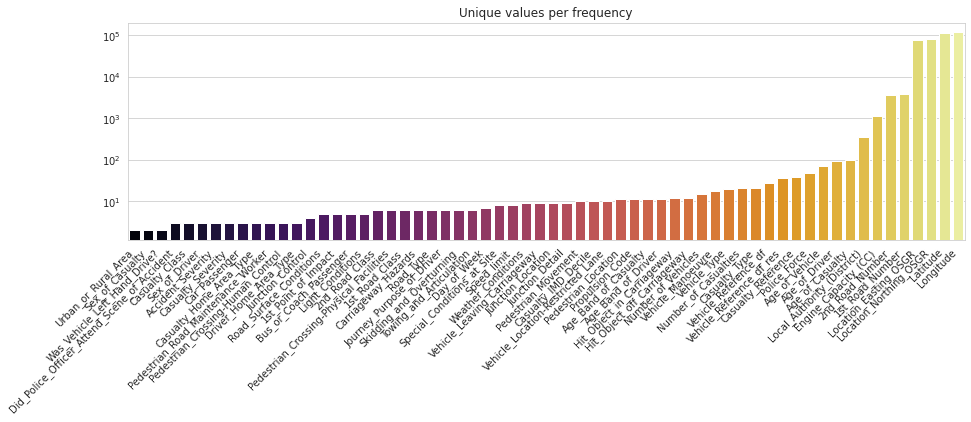

In [16]:
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

In [17]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  float64
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

# 4. Quality Investigation

In [18]:
# 4.1 Dupes
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=['Accident_Index'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [19]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=['Accident_Index'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X.drop_duplicates(subset=columns_to_consider, inplace=True)
df_X.shape

(363221, 67)

# Missing Values

Text(114.0, 0.5, 'Sample Number')

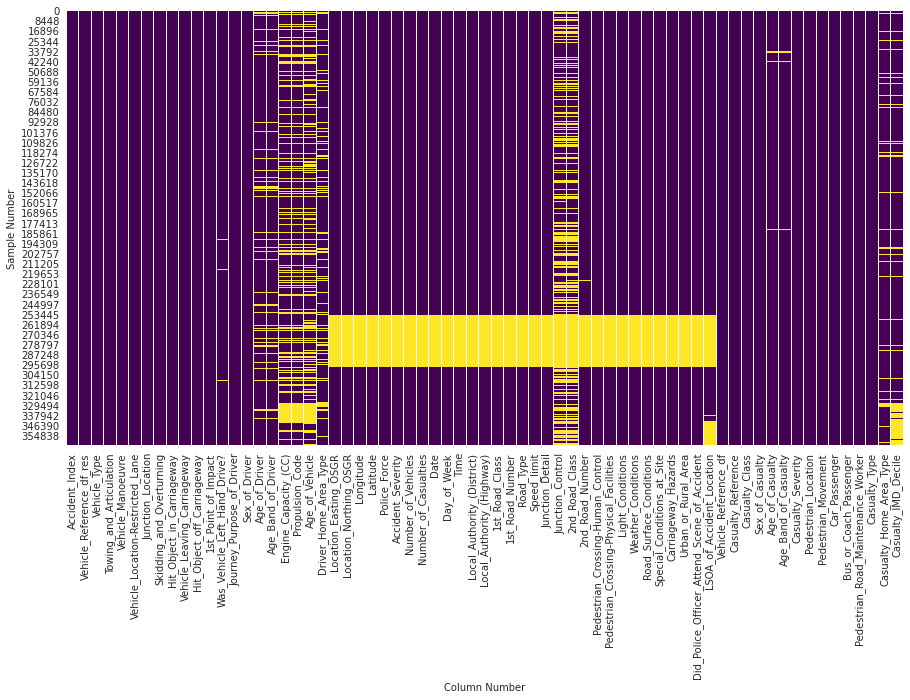

In [21]:
# Missing samples / rows
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [22]:
!pip install missingno

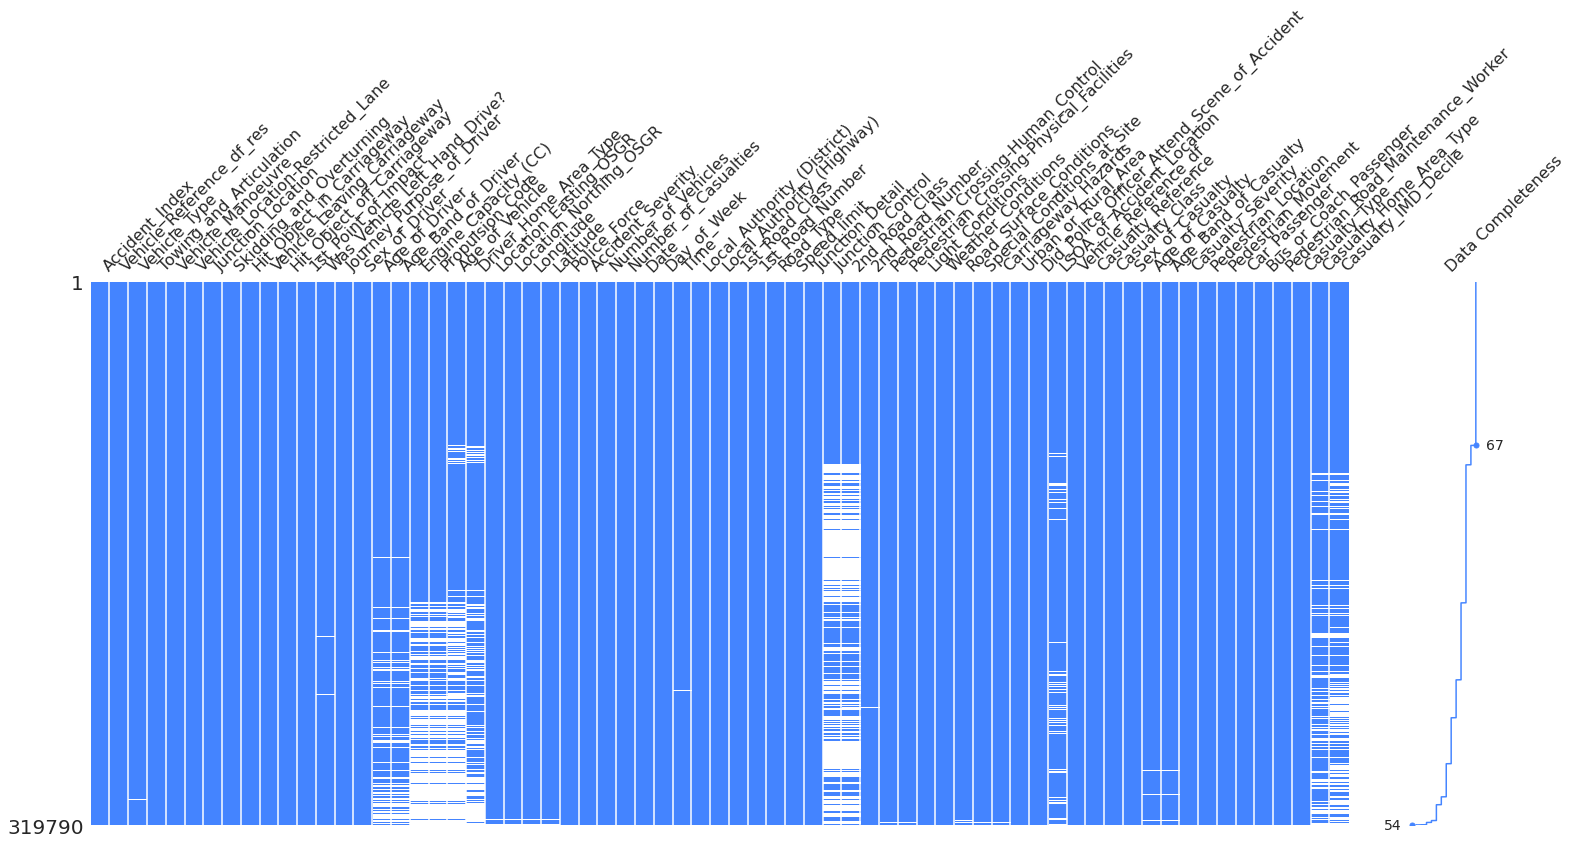

In [25]:
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [24]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

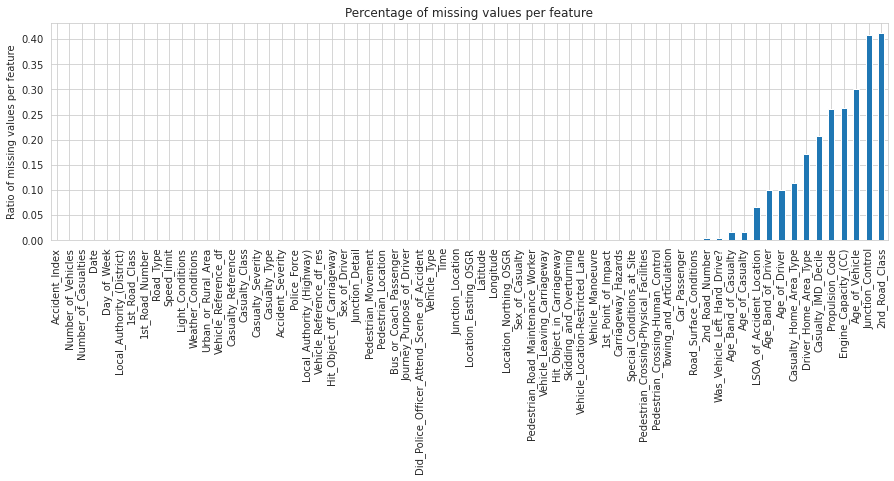

In [26]:
# per column - feature
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [27]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

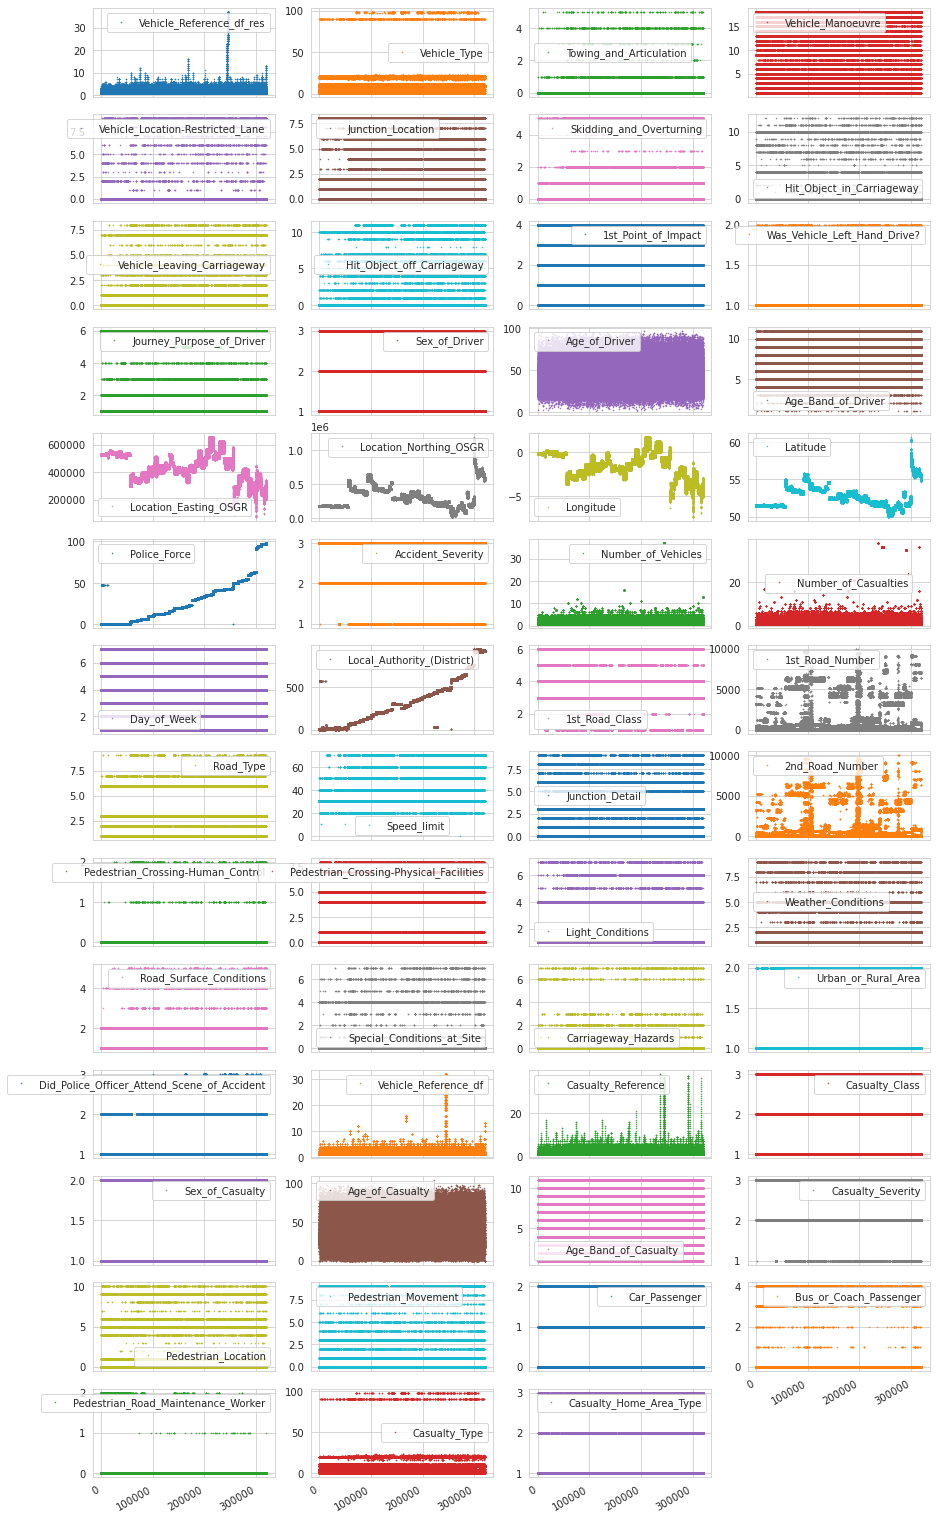

In [28]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [29]:
# Quality investigation for cat features

In [30]:
# Extract descriptive properties of non-numerical features
df_X.describe(exclude=["number", "datetime"])

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,319790,319790,319746,319790,298693
unique,123645,365,1439,204,25977
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2969,8457,1456


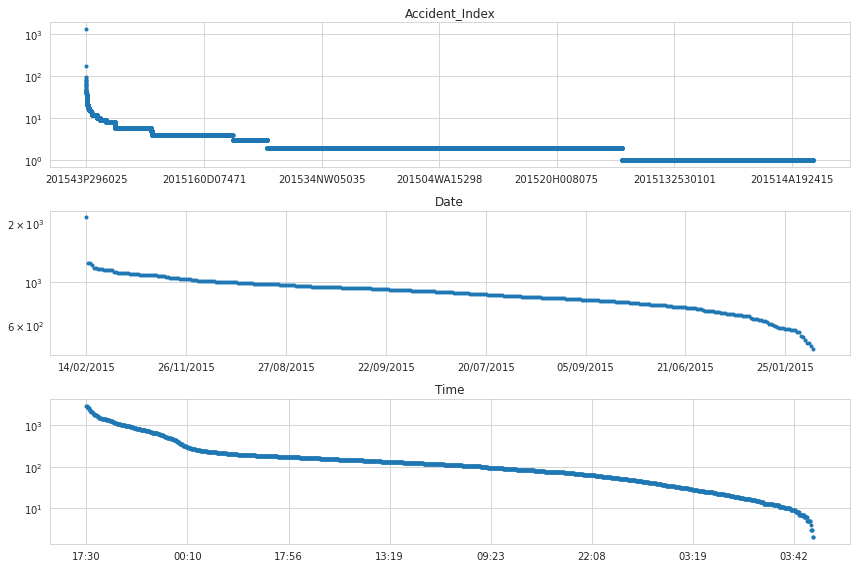

In [31]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [32]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)